# Name:-Kiran Avhad

# Email Id:-Kiranavhad886@gmail.com

# Linkedin Profile:-https://www.linkedin.com/in/kiran-avhad-296499155

# Contour Features

In [38]:
from PIL import Image
from IPython.display import Image


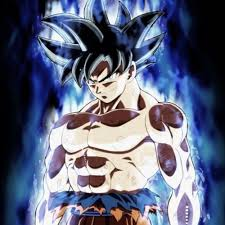

In [39]:
path="D:/FILM/download.jpg"
Image(filename=r"D:/FILM/download.jpg")

In [40]:
import cv2
import numpy as np

img = cv2.imread("D:/FILM/download.jpg",0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
M

{'m00': 0.0,
 'm10': 0.0,
 'm01': 0.0,
 'm20': 0.0,
 'm11': 0.0,
 'm02': 0.0,
 'm30': 0.0,
 'm21': 0.0,
 'm12': 0.0,
 'm03': 0.0,
 'mu20': 0.0,
 'mu11': 0.0,
 'mu02': 0.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.0,
 'nu11': 0.0,
 'nu02': 0.0,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

# 1. Aspect Ratio
It is the ratio of width to height of bounding rect of the object.

In [41]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio= float(w)/h

In [42]:
x,y,w,h

(127, 223, 1, 2)

In [43]:
aspect_ratio

0.5

# 2. Extent
Extent is the ratio of contour area to bounding rectangle area.

In [44]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

In [45]:
rect_area

2

In [46]:
x,y,w,h

(127, 223, 1, 2)

# 3. Solidity
Solidity is the ratio of contour area to its convex hull area.

In [47]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)


# 4. Equivalent Diameter
Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

In [48]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [49]:
area

0.0

In [50]:
equi_diameter

0.0

# 5. Orientation
Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

In [51]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'


# 6. Mask and Pixel Points
In some cases, we may need all the points which comprises that object. It can be done as follows:

In [52]:
mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

In [53]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [54]:
pixelpoints

array([[223, 127],
       [224, 127]], dtype=int64)

# 7. Maximum Value, Minimum Value and their locations
We can find these parameters using a mask image.

In [55]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img,mask = mask)

In [56]:
min_val, max_val, min_loc, max_loc

(132.0, 141.0, (127, 223), (127, 224))

# 8. Mean Color or Mean Intensity
Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

In [57]:
mean_val = cv2.mean(img,mask = mask)

In [58]:
mean_val 

(136.5, 0.0, 0.0, 0.0)

# 9. Extreme Points
Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

In [59]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

In [60]:
leftmost 

(127, 223)

In [61]:
rightmost

(127, 223)

In [62]:
topmost

(127, 223)

In [63]:
bottommost

(127, 224)